## Observations and Insights 

"Total Timepoints by Regimen" chart indicates that a significant number of Propriva timepoints were not accounted for. Might be worth finding out why those timepoints were not included. If mice were removed because the drug was clearly not working, it might be worth digging into data to determine whether this was caused by outliers (one or two that were removed because of significant early growth of the tumor) or if it was a pattern (all mice under this drug saw tumor growth more quickly than in other groups).

Capomulin and Ramicane are the two most promising regimens. Ramicane has a slightly wider spread of positive results ('Final Tumor Volumes by Drug Regimen' boxplot chart), which indicates that Capomulin is likely to be slightly more reliable, although both impact tumor volume negatively.

The linear regression model of the Capomulin Regimen comparing weight to tumor size shows a positive correlation, which indicates that the size of the tumor and the weight of the mouse rise and fail in tandem. This should not necessarily be taken to mean that the mouse is gaining weight when the tumor grows, as this data does not reflect the mass of the tumor, merely it's size in millimeters cubed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Combine the data into a single dataset
dataset_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
dataset_df.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Checking the number of mice.
dataset_df['Mouse ID'].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dataset_df[dataset_df.duplicated(['Mouse ID', 'Timepoint'],keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df = dataset_df[dataset_df['Mouse ID'] == 'g989']
duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df=dataset_df[dataset_df['Mouse ID'] != 'g989']
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_data_df['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
clean_data_grp = clean_data_df.groupby('Drug Regimen')
gb_mean = clean_data_grp['Tumor Volume (mm3)'].mean()
gb_median = clean_data_grp['Tumor Volume (mm3)'].median()
gb_std = clean_data_grp['Tumor Volume (mm3)'].std()
sample = clean_data_grp.sample(30)
gb_sem = st.sem(sample['Tumor Volume (mm3)'])
gb_var = clean_data_grp['Tumor Volume (mm3)'].var()
summ_table1 = pd.DataFrame({
    'Mean':gb_mean,
    'Median':gb_median,
    'Variance':gb_var,
    'Standard Deviation':gb_std,
    'SEM':gb_sem
})
summ_table1

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.527472
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.527472
Infubinol,52.884795,51.820584,43.128684,6.567243,0.527472
Ketapril,55.235638,53.698743,68.553577,8.279709,0.527472
Naftisol,54.331565,52.509285,66.173479,8.134708,0.527472
Placebo,54.033581,52.288934,61.168083,7.821003,0.527472
Propriva,52.320930,50.446266,43.852013,6.622085,0.527472
Ramicane,40.216745,40.673236,23.486704,4.846308,0.527472
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.527472


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

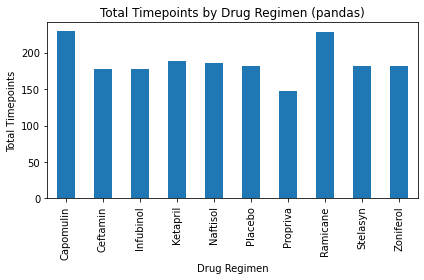

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
data_by_regimen = clean_data_df.groupby('Drug Regimen')
tp_count = data_by_regimen['Timepoint'].count()
tp_count.plot(kind='bar',ylabel='Total Timepoints',title='Total Timepoints by Drug Regimen (pandas)')
plt.tight_layout()
plt.show()

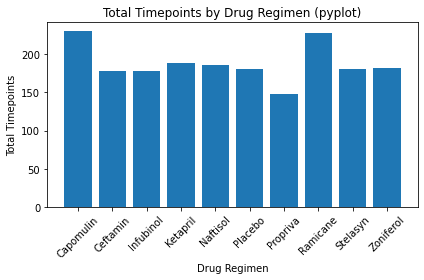

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(tp_count.keys(),tp_count)
plt.ylabel('Total Timepoints')
plt.xlabel('Drug Regimen')
plt.title('Total Timepoints by Drug Regimen (pyplot)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Distribution by Sex (pandas)'}, ylabel='Sex'>

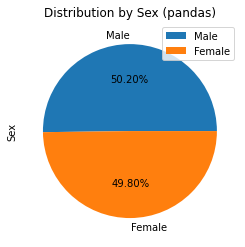

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = mouse_metadata['Sex'].value_counts()
sex_count_df = pd.DataFrame(sex_counts)
sex_count_df.plot(y='Sex',kind='pie',autopct='%.2f%%',title='Distribution by Sex (pandas)')

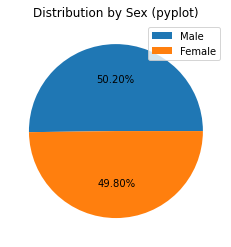

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
plt.pie(sex_count_df["Sex"],autopct='%.2f%%')
plt.title('Distribution by Sex (pyplot)')
plt.legend(labels)

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# collect list of tumor volume at final timepoint in collected data
final_timepoints = clean_data_df.sort_values('Timepoint').drop_duplicates(
    ['Mouse ID'], keep='last').sort_values('Mouse ID').reset_index(drop=True)

In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Infubinol','Capomulin','Ceftamin','Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [[],[],[],[]]

# Locate the rows which contain mice on each drug and get the tumor volumes

count = 0
for drug in final_timepoints['Drug Regimen']:
    tlcount = 0
    for treatment in treatments_list:
        if drug == treatment:
            tumor_volume = final_timepoints.iloc[count,6]
            tumor_vol_data[tlcount].append(tumor_volume)
            tlcount += 1
        else:
            tlcount += 1
    count += 1

tumor_vol_data

tumor_vol_df = pd.DataFrame(tumor_vol_data).transpose()
tumor_vol_df.columns = treatments_list
tumor_vol_df

,Infubinol,Capomulin,Ceftamin,Ramicane
0,67.973419,38.982878,62.999356,38.407618
1,65.525743,38.939633,45.000000,43.047543
2,57.031862,30.485985,56.057749,38.810366
3,66.083066,37.074024,55.742829,32.978522
4,72.226731,40.159220,48.722078,38.342008
5,36.321346,47.685963,47.784682,33.397653
6,60.969711,37.311846,61.849023,37.311236
7,62.435404,38.125164,68.923185,40.659006
8,60.918767,38.753265,67.748662,29.128472
9,67.289621,41.483008,57.918381,33.562402


In [17]:
    # add subset and determine outliers using upper and lower bounds - infubinol
inf_tumors = tumor_vol_df['Infubinol']

inf_quartiles=inf_tumors.quantile([0.25,0.5,0.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lb = inf_lowerq - (1.5*inf_iqr) # bottom whisker
inf_ub = inf_upperq + (1.5*inf_iqr) # upper whisker
inf_max = inf_tumors.max()
inf_min = inf_tumors.min()
print(f"For Infubinol, the smallest tumor was {inf_min}, and the lower bound is: {inf_lb}")
print(f"For Infubinol, the largest tumor was {inf_max}, and the upper bound is: {inf_ub}")


    # add subset and determine outliers using upper and lower bounds - capolmulin
cap_tumors = tumor_vol_df['Capomulin']

cap_quartiles=cap_tumors.quantile([0.25,0.5,0.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lb = cap_lowerq - (1.5*cap_iqr) # bottom whisker
cap_ub = cap_upperq + (1.5*cap_iqr) # upper whisker
cap_max = cap_tumors.max()
cap_min = cap_tumors.min()

print(f"\nFor Capomulin, the smallest tumor was {cap_min}, and the lower bound is: {cap_lb}")
print(f"For Capomulin, the largest tumor was {cap_max}, and the upper bound is: {cap_ub}")


    # add subset and determine outliers using upper and lower bounds - ceftamin
cef_tumors = tumor_vol_df['Ceftamin']

cef_quartiles=cef_tumors.quantile([0.25,0.5,0.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lb = cef_lowerq - (1.5*cap_iqr) # bottom whisker
cef_ub = cef_upperq + (1.5*cap_iqr) # upper whisker
cef_max = cef_tumors.max()
cef_min = cef_tumors.min()

print(f"\nFor Ceftamin, the smallest tumor was {cef_min}, and the lower bound is: {cef_lb}")
print(f"For Ceftamin, the largest tumor was {cef_max}, and the upper bound is: {cef_ub}")

    # add subset and determine outliers using upper and lower bounds - ramicane
ram_tumors = tumor_vol_df['Ramicane']

ram_quartiles=ram_tumors.quantile([0.25,0.5,0.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lb = ram_lowerq - (1.5*ram_iqr) # bottom whisker
ram_ub = ram_upperq + (1.5*ram_iqr) # upper whisker
ram_max = ram_tumors.max()
ram_min = ram_tumors.min()

print(f"\nFor Ramicane, the smallest tumor was {ram_min}, and the lower bound is: {ram_lb}")
print(f"For Ramicane, the largest tumor was {ram_max}, and the upper bound is: {ram_ub}")

For Infubinol, the smallest tumor was 36.3213458, and the lower bound is: 36.83290494999999
For Infubinol, the largest tumor was 72.2267309, and the upper bound is: 82.74144559000001

For Capomulin, the smallest tumor was 23.34359787, and the lower bound is: 20.70456164999999
For Capomulin, the largest tumor was 47.68596303, and the upper bound is: 51.83201549

For Ceftamin, the smallest tumor was 45.0, and the lower bound is: 37.04928265999999
For Ceftamin, the largest tumor was 68.92318457, and the upper bound is: 75.97262522

For Ramicane, the smallest tumor was 22.05012627, and the lower bound is: 17.912664470000003
For Ramicane, the largest tumor was 45.22086888, and the upper bound is: 54.30681135


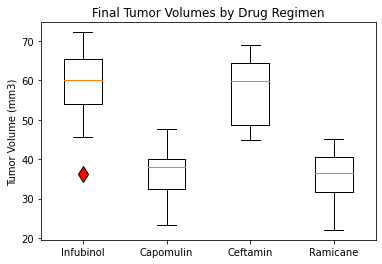

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='d', markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_df, labels=treatments_list,flierprops=flierprops)
plt.title('Final Tumor Volumes by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mice = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin'].copy().reset_index()
cap_mice

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...,...
225,440,i557,Capomulin,Female,1,24,45,47.685963,1
226,1452,r157,Capomulin,Male,22,25,0,45.000000,0
227,1453,r157,Capomulin,Male,22,25,5,45.597064,0
228,1454,r157,Capomulin,Male,22,25,10,46.059608,0


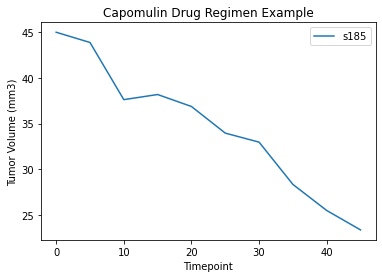

In [20]:
cap_mouse = cap_mice[cap_mice['Mouse ID']=='s185']
cap_mouse.plot('Timepoint','Tumor Volume (mm3)',title='Capomulin Drug Regimen Example',
               label='s185',ylabel='Tumor Volume (mm3)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

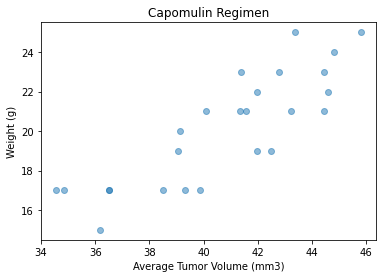

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mice_grp = cap_mice.groupby('Mouse ID')
x = cap_mice_grp['Tumor Volume (mm3)'].mean()
y = cap_mice_grp['Weight (g)'].mean()
#x=cap_mice['Tumor Volume (mm3)']
#y=cap_mice['Weight (g)']


plt.scatter(x,y,alpha=0.5)
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Capomulin Regimen')
plt.show

In [22]:
x

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Correlation
correlation = st.pearsonr(x,y)
print(round(correlation[0],2))

0.84


<function matplotlib.pyplot.show(close=None, block=None)>

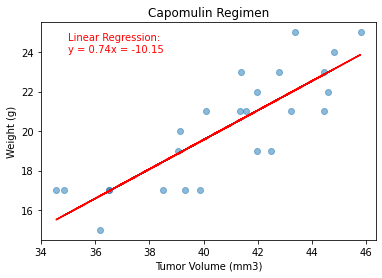

In [26]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
lin_regress = x*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x = '+str(round(intercept,2))
plt.scatter(x,y,alpha=0.5)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Capomulin Regimen')
plt.plot(x,lin_regress,'r')
plt.annotate(line_eq,(35,24),color='red')
plt.show

In [25]:
line_eq

'Linear Regression:\ny = 0.74x = -10.15'